# Example to connect to postgres

This is a tutorial to connect to our PostgreSQL database using python.

First you need to install the following libraries:
- psycopg2
- python-dotenv

Then you need to create a file with the name ".env". This file will contain the connection information and your credentials. This is an example:

```
DB_HOST=host_name
DB_NAME=postgres
DB_USER=my_user
DB_PASSWORD=my_password
DB_PORT=5432
```

After that you´re all set. We will import your credentials and connect to the database.

In [30]:
import os
import pandas as pd
import numpy as np
import os
import psycopg2 # PostgreSQL database adapter for Python
from dotenv import load_dotenv # Reads the key-value pair from .env file and adds them to environment variable
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [31]:
# Load environment variables from .env file
load_dotenv()

# Accessing credentials
db_host = os.getenv("DB_HOST")
db_name = os.getenv("DB_NAME")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_port = os.getenv("DB_PORT")

In [32]:
# Connect to the database
conn = psycopg2.connect(
    host=db_host,
    dbname=db_name,
    user=db_user,
    password=db_password,
    port=db_port
)

Now we can query our data (write sql code) and store it as a pandas dataframe

In [33]:
query_main=query="""
    select * 
    from agg.tidy_data_30min
    where site = 64
"""
df_main = pd.read_sql_query(query_main, conn)

#agg.tidy_data_v2


In [34]:
pd.set_option('display.max_columns', None)

df_main

,timestamp,site,year,month,day,hour,minute,day_of_week,season,net_load,precipitation,precipitation_probability,wind_direction,wind_speed,solar_radiation,sunshine_duration,avg_net_load,q25_net_load,q75_net_load,median_net_load,weekend_or_bank_holiday
0,2019-04-29 05:30:00+00:00,64,2019,4,29,6,30,0,2,14.43,0.0,47.0,154.0,3.0,4.0,1.0,447.46,50.6525,324.41,190.21,0
1,2019-04-23 15:00:00+00:00,64,2019,4,23,16,0,1,2,-177.55,NaN,NaN,NaN,NaN,NaN,NaN,-27.63,-75.8800,12.71,2.03,0
2,2019-04-23 15:30:00+00:00,64,2019,4,23,16,30,1,2,4.58,NaN,NaN,NaN,NaN,NaN,NaN,-24.74,-34.7600,16.66,5.71,0
3,2019-04-23 16:00:00+00:00,64,2019,4,23,17,0,1,2,14.70,NaN,NaN,NaN,NaN,NaN,NaN,5.20,-11.6750,17.73,9.42,0
4,2019-04-23 16:30:00+00:00,64,2019,4,23,17,30,1,2,12.82,NaN,NaN,NaN,NaN,NaN,NaN,28.17,5.0250,28.62,15.78,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17534,2020-03-30 09:00:00+00:00,64,2020,3,30,10,0,0,2,11.33,NaN,NaN,NaN,NaN,NaN,NaN,-18.76,-20.7500,35.43,7.21,0
17535,2020-03-30 09:30:00+00:00,64,2020,3,30,10,30,0,2,8.46,NaN,NaN,NaN,NaN,NaN,NaN,21.09,-68.9825,65.76,6.49,0
17536,2020-03-30 10:00:00+00:00,64,2020,3,30,11,0,0,2,0.22,NaN,NaN,NaN,NaN,NaN,NaN,-43.60,-146.5200,85.88,8.58,0
17537,2020-03-30 10:30:00+00:00,64,2020,3,30,11,30,0,2,-5.47,NaN,NaN,NaN,NaN,NaN,NaN,-122.59,-169.0875,26.46,-1.58,0


In [35]:
df_main = df_main[['timestamp','net_load']]
df_main

,timestamp,net_load
0,2019-04-29 05:30:00+00:00,14.43
1,2019-04-23 15:00:00+00:00,-177.55
2,2019-04-23 15:30:00+00:00,4.58
3,2019-04-23 16:00:00+00:00,14.70
4,2019-04-23 16:30:00+00:00,12.82
...,...,...
17534,2020-03-30 09:00:00+00:00,11.33
17535,2020-03-30 09:30:00+00:00,8.46
17536,2020-03-30 10:00:00+00:00,0.22
17537,2020-03-30 10:30:00+00:00,-5.47


### Convert Convert 'ts' to datetime and set as index

### Normalise net_load

In [36]:
df_main.rename(columns={'timestamp':'ts'},inplace=True)
df_main['ts'] = pd.to_datetime(df_main['ts'])
df_main.set_index('ts', inplace=True)
df_main.sort_index(inplace=True)
df_main.head()

#df_main['datetime'] = pd.to_datetime(df_main['timestamp'])
#df_main.set_index('datetime', inplace=True)

,net_load
ts,
2019-04-01 00:00:00+00:00,14.62
2019-04-01 00:30:00+00:00,16.70
2019-04-01 01:00:00+00:00,20.27
2019-04-01 01:30:00+00:00,15.87
2019-04-01 02:00:00+00:00,15.12


<Axes: xlabel='ts'>

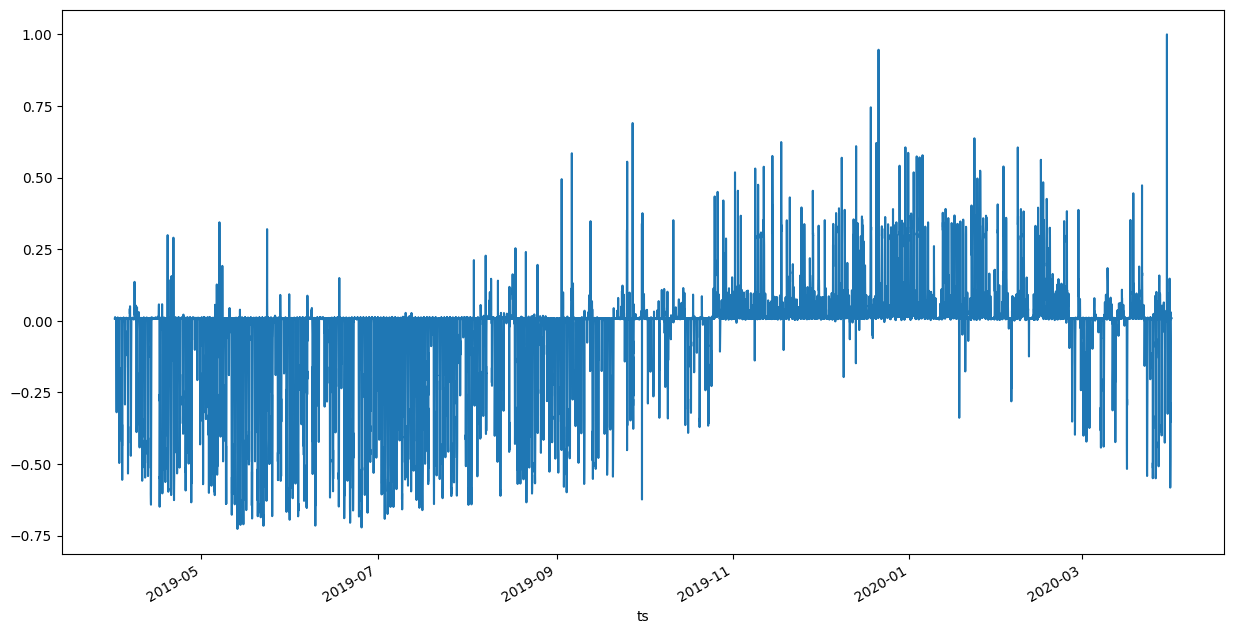

In [37]:
df_main['net_load_norm'] = df_main['net_load'] / max(abs(df_main['net_load']))
df_main.drop('net_load',axis=1,inplace=True)

plt.figure(figsize=(15,8))
df_main['net_load_norm'].plot()

In [38]:
df_main.head()

,net_load_norm
ts,
2019-04-01 00:00:00+00:00,0.007819
2019-04-01 00:30:00+00:00,0.008931
2019-04-01 01:00:00+00:00,0.010840
2019-04-01 01:30:00+00:00,0.008487
2019-04-01 02:00:00+00:00,0.008086


### Creating function for lagged net_load

In [39]:
#Creating function for lagged net_load

def create_lagged_features(df, lags):
    df_lagged = df.copy()
    for lag in lags:
        df_lagged[f'net_load_lag_{lag}'] = df_lagged['net_load_norm'].shift(lag)
    # Remove rows with NaN values due to shifting
    df_lagged = df_lagged.dropna()
    return df_lagged

# Define your lags
lags = [1,2,3,4,5,48,96]


# Prepare your dataset with lagged features
df_lagged = create_lagged_features(df_main, lags)

df_lagged

,net_load_norm,net_load_lag_1,net_load_lag_2,net_load_lag_3,net_load_lag_4,net_load_lag_5,net_load_lag_48,net_load_lag_96
ts,,,,,,,,
2019-04-03 00:00:00+00:00,0.009385,0.007669,0.009279,0.007674,0.008000,0.007653,0.008535,0.007819
2019-04-03 00:30:00+00:00,0.010353,0.009385,0.007669,0.009279,0.007674,0.008000,0.011573,0.008931
2019-04-03 01:00:00+00:00,0.007835,0.010353,0.009385,0.007669,0.009279,0.007674,0.009230,0.010840
2019-04-03 01:30:00+00:00,0.009353,0.007835,0.010353,0.009385,0.007669,0.009279,0.007808,0.008487
2019-04-03 02:00:00+00:00,0.009541,0.009353,0.007835,0.010353,0.009385,0.007669,0.008407,0.008086
...,...,...,...,...,...,...,...,...
2020-03-31 20:30:00+00:00,0.007696,0.007861,0.007952,0.007995,0.007696,0.007364,0.007712,0.007658
2020-03-31 21:00:00+00:00,0.007867,0.007696,0.007861,0.007952,0.007995,0.007696,0.007867,0.007856
2020-03-31 21:30:00+00:00,0.007995,0.007867,0.007696,0.007861,0.007952,0.007995,0.007958,0.008006


In [40]:
[ - 1 - lag for lag in lags]

[-2, -3, -4, -5, -6, -49, -97]

#### Create initial_ts by taking the last 96 observations (48 hours) from this point backward to cover all lags

(Previously took the last 192 observations of 15 minute-intervalls (48 hours) from this point backward to cover all lags)

In [41]:
# Identify the time point for initial_ts
end_time = df_lagged.index[-1]
start_time = end_time - pd.Timedelta(hours=24)  # 192 intervals of 15 minutes is equivalent to 48 hours

# Make sure you don't go out of bounds
if start_time < df_lagged.index[0]:
    raise ValueError("Not enough data points for the required lags.")

# Create initial_ts for rolling predictions
# We select the data between 'start_time' and 'end_time', including all necessary lags.
initial_ts = df_lagged.loc[start_time:end_time]['net_load_norm']

In [42]:
initial_ts

ts
2020-03-30 22:30:00+00:00    0.009612
2020-03-30 23:00:00+00:00    0.008091
2020-03-30 23:30:00+00:00    0.007770
2020-03-31 00:00:00+00:00    0.017840
2020-03-31 00:30:00+00:00    0.025541
2020-03-31 01:00:00+00:00    0.019407
2020-03-31 01:30:00+00:00    0.018840
2020-03-31 02:00:00+00:00    0.022798
2020-03-31 02:30:00+00:00    0.026953
2020-03-31 03:00:00+00:00    0.027258
2020-03-31 03:30:00+00:00    0.049088
2020-03-31 04:00:00+00:00    0.053061
2020-03-31 04:30:00+00:00    0.047366
2020-03-31 05:00:00+00:00    0.045580
2020-03-31 05:30:00+00:00    0.147103
2020-03-31 06:00:00+00:00    0.031590
2020-03-31 06:30:00+00:00    0.033232
2020-03-31 07:00:00+00:00    0.004337
2020-03-31 07:30:00+00:00    0.004722
2020-03-31 08:00:00+00:00    0.005824
2020-03-31 08:30:00+00:00    0.007701
2020-03-31 09:00:00+00:00   -0.012888
2020-03-31 09:30:00+00:00   -0.016856
2020-03-31 10:00:00+00:00   -0.069030
2020-03-31 10:30:00+00:00   -0.240578
2020-03-31 11:00:00+00:00   -0.582664
2020-03-3

### Define features and target, train and test

In [43]:
# Define features and target
X = df_lagged[[f'net_load_lag_{lag}' for lag in lags]]
y = df_lagged['net_load_norm']

# Reserve the last 72 observations for testing - 36 hours
train_features = X.iloc[:-72]
test_features = X.iloc[-72:]

train_target = y.iloc[:-72]
test_target = y.iloc[-72:]

### Model definition and training 

In [44]:
rf = RandomForestRegressor()

# TRAIN the model
rf.fit(train_features, train_target)

# TEST the model - Predict on the test set - Make predictions for the test set
y_pred = rf.predict(test_features)


### Create get_input function 

In [45]:
def get_input(ts, lags):
    # Convert lags to positions from the end of the series
    positions = [ - 1 - lag for lag in lags]
    # Use iloc to get values at positions
    return ts.iloc[positions].values.reshape(1, -1)

In [46]:
print(train_target.tail())
print(train_target.iloc[-2])
print(get_input(train_target, lags))

ts
2020-03-30 08:30:00+00:00    0.006022
2020-03-30 09:00:00+00:00    0.006059
2020-03-30 09:30:00+00:00    0.004524
2020-03-30 10:00:00+00:00    0.000118
2020-03-30 10:30:00+00:00   -0.002925
Name: net_load_norm, dtype: float64
0.00011765272125397867
[[ 0.00011765  0.00452428  0.00605912  0.00602168  0.00482376 -0.03930136
   0.00996305]]


In [47]:
#input_features = get_input(train_target, lags)
#pred = rf.predict(input_features)
#print(input_features)
#print(pred)

In [48]:
initial_ts

ts
2020-03-30 22:30:00+00:00    0.009612
2020-03-30 23:00:00+00:00    0.008091
2020-03-30 23:30:00+00:00    0.007770
2020-03-31 00:00:00+00:00    0.017840
2020-03-31 00:30:00+00:00    0.025541
2020-03-31 01:00:00+00:00    0.019407
2020-03-31 01:30:00+00:00    0.018840
2020-03-31 02:00:00+00:00    0.022798
2020-03-31 02:30:00+00:00    0.026953
2020-03-31 03:00:00+00:00    0.027258
2020-03-31 03:30:00+00:00    0.049088
2020-03-31 04:00:00+00:00    0.053061
2020-03-31 04:30:00+00:00    0.047366
2020-03-31 05:00:00+00:00    0.045580
2020-03-31 05:30:00+00:00    0.147103
2020-03-31 06:00:00+00:00    0.031590
2020-03-31 06:30:00+00:00    0.033232
2020-03-31 07:00:00+00:00    0.004337
2020-03-31 07:30:00+00:00    0.004722
2020-03-31 08:00:00+00:00    0.005824
2020-03-31 08:30:00+00:00    0.007701
2020-03-31 09:00:00+00:00   -0.012888
2020-03-31 09:30:00+00:00   -0.016856
2020-03-31 10:00:00+00:00   -0.069030
2020-03-31 10:30:00+00:00   -0.240578
2020-03-31 11:00:00+00:00   -0.582664
2020-03-3

### Rolling origin prediction

Create a function that performs sequential predictions over a specified number of steps, using each prediction as input for the next

In [49]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
def rolling_window_predictions(model, full_series, n, lags):
    
    initial_ts = full_series.copy()#[-max(lags):] # Initial time series for rolling predictions    
    predictions = []  # Store out-of-sample predictions
    
    for i in range(0, n): # Iterate over the test set to predict one step ahead each time
        
        input_features = get_input(initial_ts, lags).reshape(1, -1) # Get the input features for the current prediction
        
        pred = model.predict(input_features)[0] # Predict the next time step and store the prediction
        predictions.append(pred)
        
        # Append the actual observed value to roll the window forward
        initial_ts = pd.concat([initial_ts, pd.Series([pred])], ignore_index=True)
    
    return predictions

In [29]:
predicted_values = rolling_window_predictions(rf, train_target, 36, lags=[1,2,3,4,5,48,96])

IndexError: list index out of range

In [22]:
len(predicted_values)

36

## Trying to implement the rolling window predictions with the new function

## Re-define train + test to include 30 days for test

In [23]:
# Define features and target
X = df_lagged[[f'net_load_lag_{lag}' for lag in lags]]
y = df_lagged['net_load_norm']

# Reserve the last 72 observations for testing - 36 hours
train_features = X.iloc[:-2160]
test_features = X.iloc[-2160:]

train_target = y.iloc[:-2160]
test_target = y.iloc[-2160:]


In [24]:
test_target

ts
2020-02-15 21:00:00+00:00    0.332241
2020-02-15 21:30:00+00:00    0.270045
2020-02-15 22:00:00+00:00    0.176067
2020-02-15 22:30:00+00:00    0.068488
2020-02-15 23:00:00+00:00    0.051104
                               ...   
2020-03-31 20:30:00+00:00    0.007696
2020-03-31 21:00:00+00:00    0.007867
2020-03-31 21:30:00+00:00    0.007995
2020-03-31 22:00:00+00:00    0.007990
2020-03-31 22:30:00+00:00    0.008575
Name: net_load_norm, Length: 2160, dtype: float64

In [25]:
rf = RandomForestRegressor()

# TRAIN the model
rf.fit(train_features, train_target)

# TEST the model - Predict on the test set - Make predictions for the test set
y_pred = rf.predict(test_features)

KeyboardInterrupt: 

In [ ]:
def nested_prediction_model(model, input_ts, true_data, n_steps, n_days, lags=[1,2,3,4,5,48,96] ):
    full_predictions = []
    ts = input_ts.copy()
# Iterate over each day in the test data
    for day in range(0, n_days):
        #current_test_series = ts[day*72 : (day+1)*72] # Current test series to be the next 36 hours (72 intervals of 30 minutes)
        # Make predictions for the current day
        pred_day = rolling_window_predictions(model, ts, n_steps, lags)

        # Append the day's predictions to the full predictions
        full_predictions.extend(pred_day)

        # update true values
        true_values = true_data[day*n_steps : (day+1)*n_steps]

        ts = pd.concat([ts, pd.Series(true_values)]) # Update ts by appending the predicted values

    return full_predictions



In [ ]:
full_predictions=nested_prediction_model(rf, train_target, test_target, 72, 30, lags=[1,2,3,4,5,48,96])
full_predictions

C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:

[0.2530092357386184,
 0.2773200849238733,
 0.07814659529068245,
 0.1931032166093555,
 0.03398024503853126,
 0.19780264064580647,
 0.026690375472616323,
 0.21716861915279345,
 0.026946056227305056,
 0.2398490996999856,
 0.02876378254407965,
 0.19782095766106395,
 0.027988440250065496,
 0.22643838556935894,
 0.029540726559032247,
 0.23677620540560784,
 0.030654252282730162,
 0.1989533038060656,
 0.027511667869041814,
 0.20563413357327362,
 0.02809151243054478,
 0.2450764366359878,
 0.02760263481397498,
 0.23702348570786824,
 0.030512026175056536,
 0.20290194304538725,
 0.027906194115759574,
 0.22830873905695998,
 0.027642369346653036,
 0.2681914715788459,
 0.02727673677610151,
 0.241742177227781,
 0.029164635124150334,
 0.23807137797541053,
 0.027689056085586992,
 0.22807549582065448,
 0.026262623797402008,
 0.2596143934146563,
 0.026873187942200415,
 0.26334952340486967,
 0.08091576599943308,
 0.24086455662571984,
 0.08231984427057983,
 0.24512031903674483,
 0.075776374264002,
 0.261044

In [ ]:
len(full_predictions)

2160

Convert full_predictions into a Pandas Series with the same index as the test_target

In [ ]:
full_predictions_series = pd.Series(full_predictions, index=test_target.index[:len(full_predictions)])



In [ ]:
len(test_target)

2160

In [ ]:
len(train_target)

15283

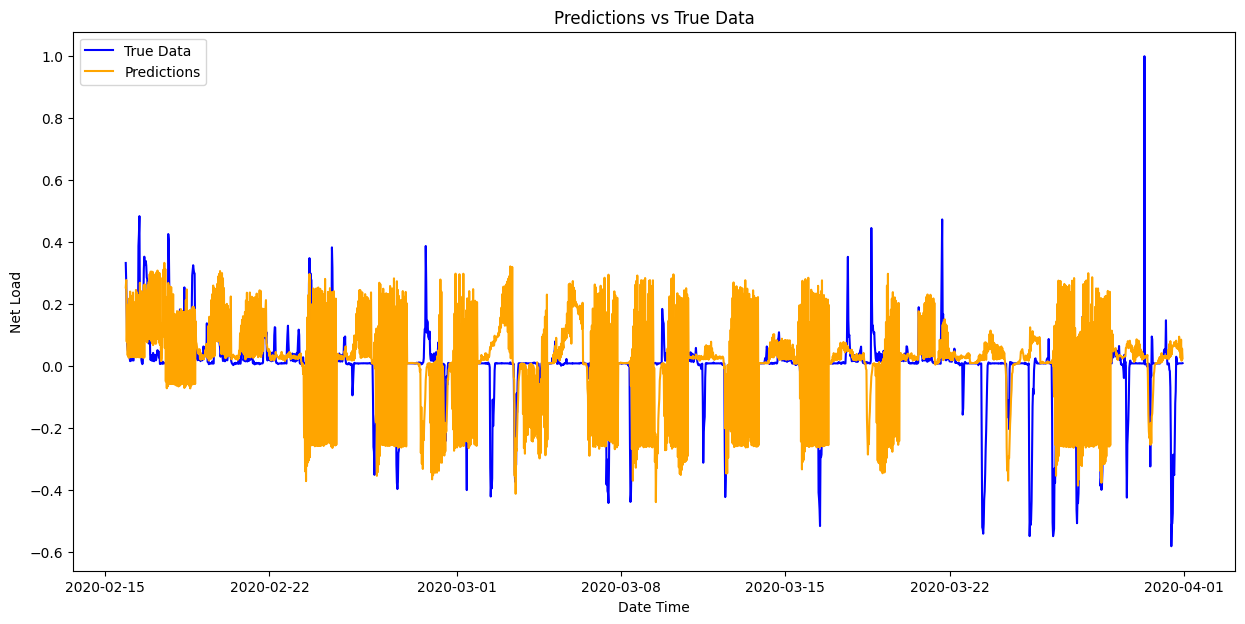

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(test_target.index, test_target, label='True Data', color='blue')
plt.plot(full_predictions_series.index, full_predictions_series, label='Predictions', color='orange')

plt.title('Predictions vs True Data')
plt.xlabel('Date Time')
plt.ylabel('Net Load')
plt.legend()
plt.show()

In [ ]:
train_target

ts
2019-04-03 00:00:00+00:00    0.009385
2019-04-03 00:30:00+00:00    0.010353
2019-04-03 01:00:00+00:00    0.007835
2019-04-03 01:30:00+00:00    0.009353
2019-04-03 02:00:00+00:00    0.009541
                               ...   
2020-03-01 18:30:00+00:00    0.008343
2020-03-01 19:00:00+00:00    0.007717
2020-03-01 19:30:00+00:00    0.007813
2020-03-01 20:00:00+00:00    0.007728
2020-03-01 20:30:00+00:00    0.008059
Name: net_load_norm, Length: 16003, dtype: float64

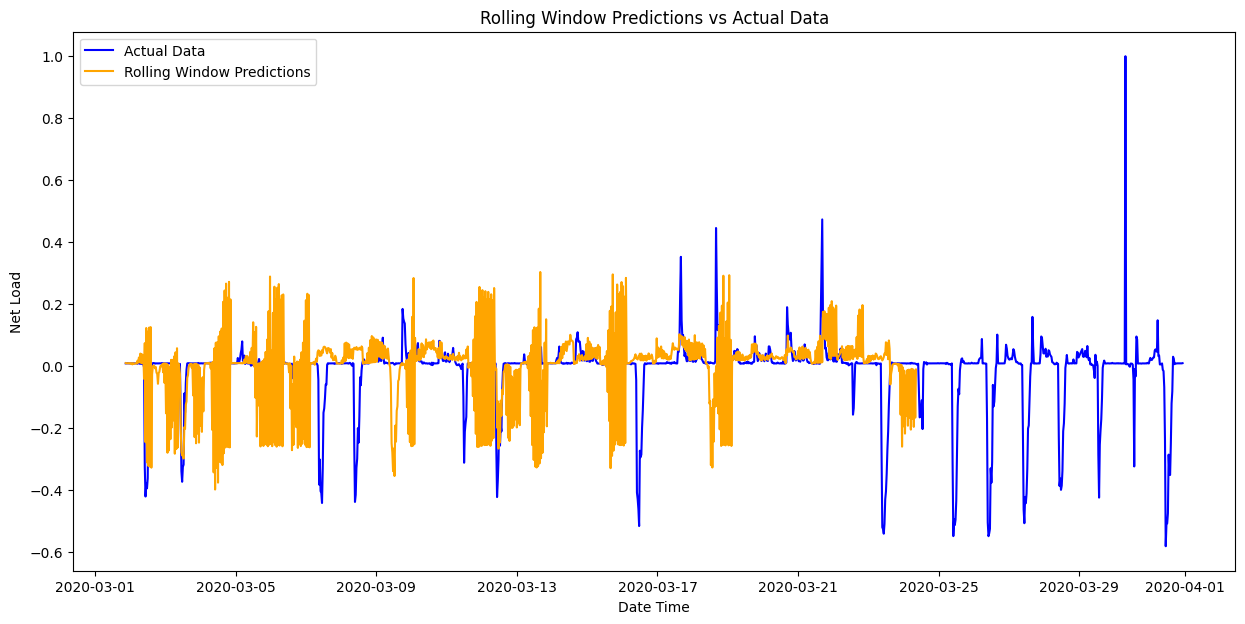

In [ ]:
# Plot the full predictions against the actual data
plt.figure(figsize=(15, 7))
plt.plot(test_target.index, test_target, label='Actual Data', color='blue')
plt.plot(full_predictions_series.index, full_predictions_series, label='Rolling Window Predictions', color='orange')
plt.legend()
plt.xlabel('Date Time')
plt.ylabel('Net Load')
plt.title('Rolling Window Predictions vs Actual Data')
plt.show()